In [34]:
# Program 08b: The Lorenz attractor. See Figure 8.11.
# In this case, the odeint numerical solver was used to solve the ODE.
#%%
!pip install plotly==5.15.0
#%matplotlib widget
import plotly.graph_objects as go
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [47]:
def Lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations"""
    x, y, z = X
    dx = -sigma * (x - y)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    return (dx, dy, dz)

In [51]:
import time


# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
r_crit=sigma*(sigma+beta+3)/(sigma-beta-1)
rho=0.5
print('r_crit=',r_crit)
x0, y0, z0 = 0, 1, 5
# Maximum time point and total number of time points
tmax, n = 100, 10000

#%%
start_time = time.time()
start_cpu_time = time.process_time()
# Integrate the Lorenz equations on the time grid t.
t = np.linspace(0, tmax, n)
f = odeint(Lorenz, (x0, y0, z0), t, args=(sigma, beta, rho))
print("Wall--- %s seconds ---" % (time.time() - start_time))
print("CPU --- %s seconds ---" % (time.process_time() - start_cpu_time))
x, y, z = f.T
f1 = odeint(Lorenz, (x0, y0, z0-0.01), t, args=(sigma, beta, rho))
x1, y1, z1 = f1.T


r_crit= 24.738670456339804
Wall--- 0.0018508434295654297 seconds ---
CPU --- 0.0020439999999997127 seconds ---


In [54]:
fig = go.Figure(data=[go.Scatter3d(
     x=x, y=y, z=z,
     mode='lines',
     line=dict(width=3, color=z, colorscale='viridis')
 )])
#fig.add_trace(go.Scatter3d(
#     x=x1, y=y1, z=z1,
#     mode='lines',
#     line=dict(width=3, color='red')
# ))
fig.update_layout(
     scene=dict(
         xaxis_title='x',
         yaxis_title='y',
         zaxis_title='z',
     ),
     title='Interactive Lorenz Attractor'
)
fig.show()

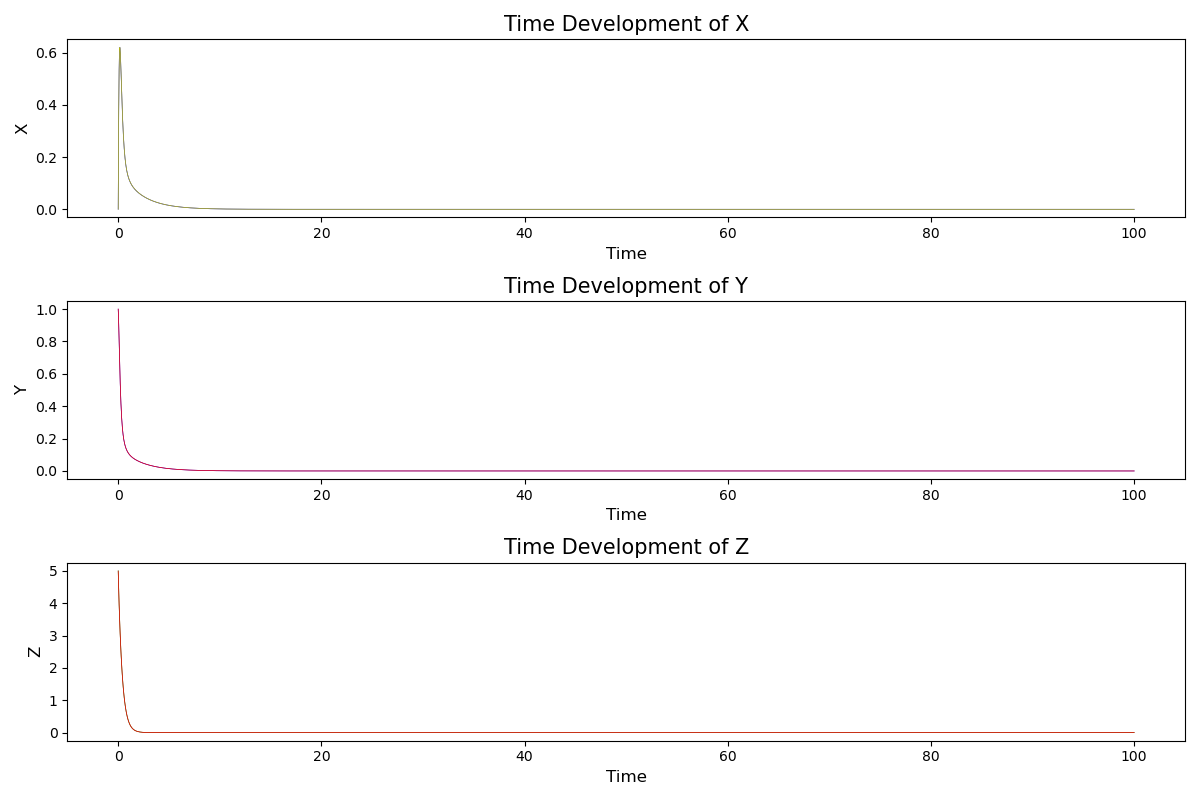

In [53]:
# Plot the time development of the three variables
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, 'b-', lw=0.5)
plt.plot(t, x1, 'y-', lw=0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('X', fontsize=12)
plt.title('Time Development of X', fontsize=15)

plt.subplot(3, 1, 2)
plt.plot(t, y, 'b-', lw=0.5)
plt.plot(t, y1, 'r', lw=0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Time Development of Y', fontsize=15)

plt.subplot(3, 1, 3)
plt.plot(t, z, 'g-', lw=0.5)
plt.plot(t, z1, 'r-', lw=0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Z', fontsize=12)
plt.title('Time Development of Z', fontsize=15)

plt.tight_layout()
plt.show()